#To do


Random Forest

* Criação da árvore
  * Gerar várias árvores
  * Utilizar critérios aleatórios para seleção de colunas
  * Árvores pequenas de tamanho provável 3, ou menor
  * Utilizar apenas uma pequena fração dos dados para a criação das árvores
  * Criar um dicionário com essas várias árvores e exportar

* Previsão da árvore
  * Fazer a previsão dos dados com todas as árvores
  * Utilizar essa previsão e fazer uma votação para ver qual a previsão que foi escolhida


Bagging (Bootstrap Aggregation) — Decisions trees are very sensitive to the data they are trained on — small changes to the training set can result in significantly different tree structures. Random forest takes advantage of this by allowing each individual tree to randomly sample from the dataset with replacement, resulting in different trees. This process is known as bagging.


Feature Randomness — In a normal decision tree, when it is time to split a node, we consider every possible feature and pick the one that produces the most separation between the observations in the left node vs. those in the right node. In contrast, each tree in a random forest can pick only from a random subset of features. This forces even more variation amongst the trees in the model and ultimately results in lower correlation across trees and more diversification.





https://towardsdatascience.com/understanding-random-forest-58381e0602d2




Pergunta que esqueci de fazer na outra aula.

1)Suponha as seguintes impurezas: 0,3 e 0,9.
O algoritmo vai selecionar 0,3, pois é mais próximo de 0, porém 0,9 é mais puro, pois está mais distante de 0,5. Não seria melhor colocar o cálculo como mais distante de 0,5?

Pergunta da random forest

2) No algoritmo do Random forest, o root é selecionado dentre 2 colunas aleatórias, e pega a de menor impureza. 
Essa coluna selecionada no root, não irá se repetir nos seus ramos. Caso seja selecionado, em um nodo de ramo, uma coluna, ela poderá se repetir ou deverei tirar da aleatoriedade assim como tirei o selecionado no root?
Caso não puder repetir seria só nos ramos descendentes ou nos ramos primos também?


bagging pode ter row repetidas

Steps

* colocar o bootstrap no começo da func_tree, randomizando as linhas, pode ter linhas repetidas (1° rodada)

* colocar o aleatoriedade das colunas alguma variável, 2 ou alguma variável, no começo da func_tree. Não escolher mais funções binárias nos descendentes. (todas rodadas)

* colocar um loop na DecisionTreeClassification, para chamar a função func_tree, e adicionar as árvores em um dicionário

* ajustar a função predict, 

In [450]:
'''
random forest

varias arvores

append arvores

colocar fraçao dos dados nas arvores

fazer eleição no prediction

nodo aleatório de escolha

max depth = pouco
'''

'\nrandom forest\n\nvarias arvores\n\nappend arvores\n\ncolocar fraçao dos dados nas arvores\n\nfazer eleição no prediction\n\nnodo aleatório de escolha\n\nmax depth = pouco\n'

#Decision Tree without sklearn

##Importing Libraries and data


In [451]:
import pandas as pd
import numpy as np
import math
from itertools import combinations
import random
import statistics as st

## Impurity Functions 

### def impurity deletar

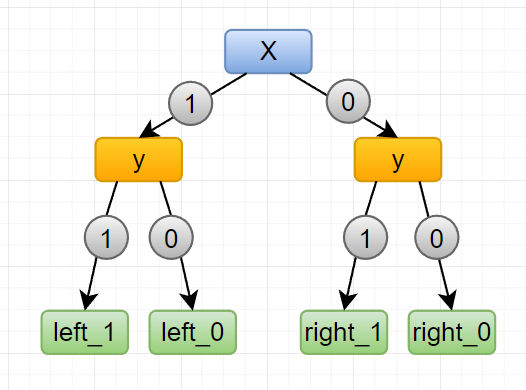

In [452]:
# caculating impurity
def impurity(left_1, left_0, right_1, right_0):

  #left
  try:
    a = (left_1/(left_1+left_0))**2
  except:
    a = 0
  try:
    b = (left_0/(left_1+left_0))**2
  except:
    b = 0
  impurity_left = 1 -a -b

  # right
  try:
    a = (right_1/(right_1+right_0))**2
  except:
    a = 0
  try:
    b = (right_0/(right_1+right_0))**2
  except:
    b = 0
  impurity_right = 1 -a -b

  # average
  try:
    a = impurity_left*(left_0+left_1)/(left_0+left_1+right_0+right_1)
  except:
    a = 0
  try:
    b = impurity_right*(right_0+right_1)/(left_0+left_1+right_0+right_1)
  except:
    b = 0
  impurity_average = a + b

  return impurity_average

### For Binary independent variables 

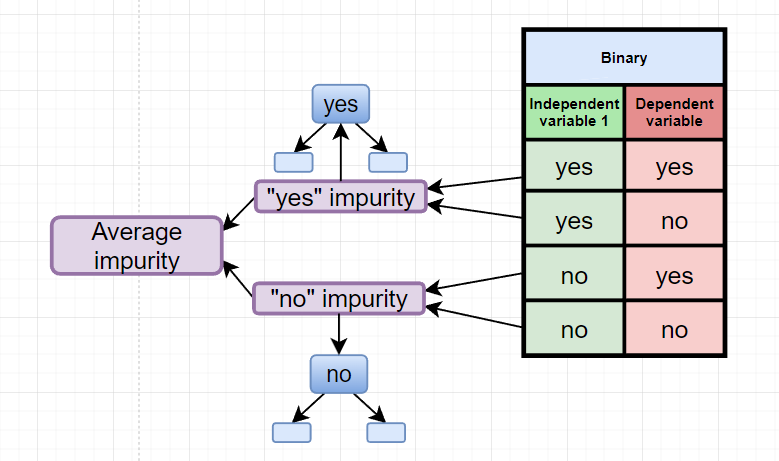

In [453]:
# calculating impurity
def gini_binary(X,y,index_to_use):
  X_temp = X.copy()
  y_temp = y.copy()
  uniques_values_list = set(X_temp)
  uniques_values_list = list(uniques_values_list)
  uniques_values_list.sort()
  uniques_values_list_y = set(y_temp)
  uniques_values_list_y = list(uniques_values_list_y)
  uniques_values_list_y.sort()

  # variables
  left_0 = 0
  left_1 = 0
  right_0 = 0
  right_1 = 0
  index = 0
  index_left = []
  index_right = []

  # adding to variables
  for i in range(len(X)):
    if i in index_to_use:
      if (X[i]==uniques_values_list[0]) & (y_temp[i]==uniques_values_list_y[0]):
        right_0 += 1 
        index_right.append(index)
      elif (X[i]==uniques_values_list[0]) & (y_temp[i]==uniques_values_list_y[1]):
        right_1 += 1 
        index_right.append(index)

      if len(uniques_values_list) >=2:
        if (X[i]==uniques_values_list[1]) & (y_temp[i]==uniques_values_list_y[0]):
          left_0 += 1 
          index_left.append(index)
        elif (X[i]==uniques_values_list[1]) & (y_temp[i]==uniques_values_list_y[1]):
          left_1 += 1 
          index_left.append(index)
    index +=1
  if len(uniques_values_list) ==1:
    uniques_values_list[1]=None

  return [impurity(left_1, left_0, right_1, right_0),(uniques_values_list[1],uniques_values_list[0]),(index_left,index_right),(left_1, left_0, right_1, right_0)]

### For Ordinal as int independent variables with only sucessor eg. 0,1,2,3,4

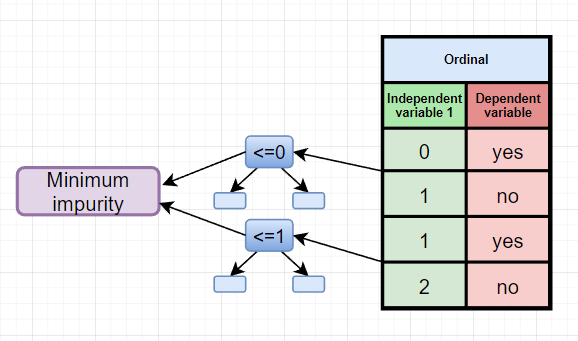

In [454]:
def gini_ordinal(X,y,index_to_use):
  
  X_temp = X.copy()
  y_temp = y.copy()
  uniques_values_list = set(X_temp)
  uniques_values_list = list(uniques_values_list)
  uniques_values_list.sort()
  uniques_values_list_y = set(y_temp)
  uniques_values_list_y = list(uniques_values_list_y)
  uniques_values_list_y.sort()
 
  impurity_dict = {}

  for x in range(len(uniques_values_list[:-1])):
    left_0 = 0
    left_1 = 0
    right_0 = 0
    right_1 = 0
    index = 0
    index_left = []
    index_right = []
    # adding to variables
    for i in range(len(X)):
      if i in index_to_use:
        if (X[i] > uniques_values_list[x]) & (y_temp[i]==uniques_values_list_y[0]):
          right_0 += 1 
          index_right.append(index)
        elif (X[i] > uniques_values_list[x]) & (y_temp[i]==uniques_values_list_y[1]):
          right_1 += 1 
          index_right.append(index)
        elif (X[i]<=uniques_values_list[x]) & (y_temp[i]==uniques_values_list_y[0]):
          left_0 += 1 
          index_left.append(index)
        elif (X[i]<=uniques_values_list[x]) & (y_temp[i]==uniques_values_list_y[1]):
          left_1 += 1 
          index_left.append(index)
      index +=1
    impurity_dict[x] = [left_1, left_0, right_1, right_0,['<=', uniques_values_list[x]],['>',uniques_values_list[x]],index_left,index_right]

  # selecting the minimum impurity
  minimum_impurity = 2
  key_selected = 0
  for k,v in impurity_dict.items():
    temp_impurity = impurity(v[0], v[1], v[2], v[3])
    if temp_impurity<minimum_impurity:
      minimum_impurity = temp_impurity
      key_selected = k


  return [minimum_impurity,(impurity_dict[key_selected][4],impurity_dict[key_selected][5]),(impurity_dict[key_selected][6],impurity_dict[key_selected][7]),
          (impurity_dict[key_selected][0],impurity_dict[key_selected][1],impurity_dict[key_selected][2],impurity_dict[key_selected][3])]

### For Discrete independent variables

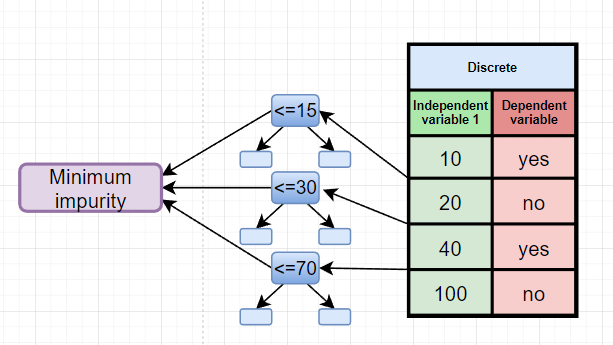

In [455]:
#same as continuous
def gini_discrete(X,y,index_to_use):
  return gini_continuous(X,y,index_to_use)


###For Categorical (Nominal or Ordinal as string) independent variables

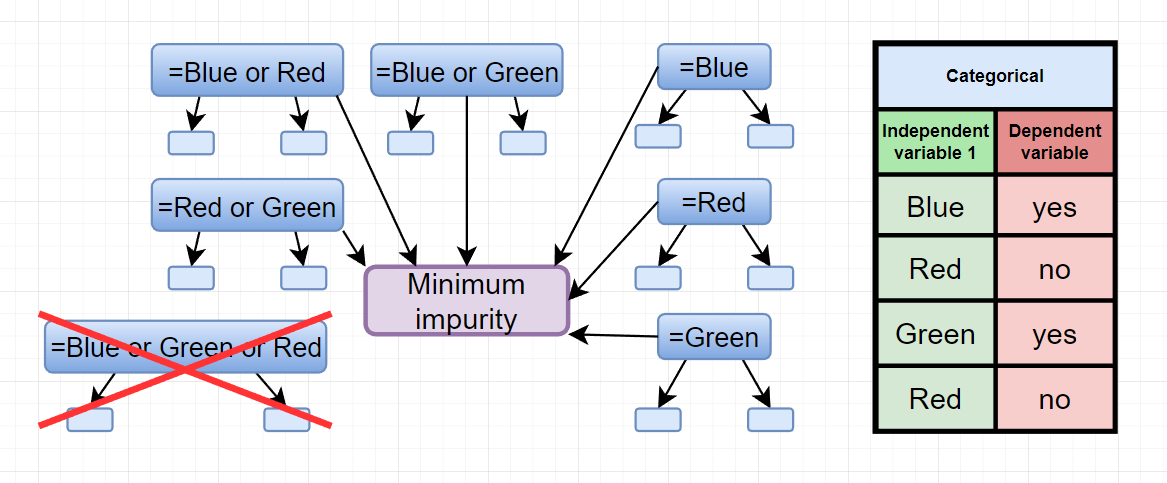

In [456]:
def gini_categorical(X,y,index_to_use):

  X_temp = X.copy()
  y_temp = y.copy()
  uniques_values_list = set(X_temp)
  uniques_values_list = list(uniques_values_list)
  uniques_values_list.sort()
  uniques_values_list_y = set(y_temp)
  uniques_values_list_y = list(uniques_values_list_y)
  uniques_values_list_y.sort()

  impurity_combination_condition_list=[]
  for i in range(len(uniques_values_list)):
    if i != 0:
      comb = list(combinations(uniques_values_list,i))
      for x in comb:
        impurity_combination_condition_list.append(x)

  impurity_dict = {}
  for x in range(len(impurity_combination_condition_list)):
    left_0 = 0
    left_1 = 0
    right_0 = 0
    right_1 = 0
    index = 0
    index_left = []
    index_right = []
    # adding to variables
    for i in range(len(X)):
      if i in index_to_use:
        if (X[i] not in impurity_combination_condition_list[x]) & (y_temp[i]==uniques_values_list_y[0]):
          right_0 += 1 
          index_right.append(index)
        elif (X[i] not in impurity_combination_condition_list[x]) & (y_temp[i]==uniques_values_list_y[1]):
          right_1 += 1 
          index_right.append(index)
        elif (X[i]in impurity_combination_condition_list[x]) & (y_temp[i]==uniques_values_list_y[0]):
          left_0 += 1 
          index_left.append(index)
        elif (X[i]in impurity_combination_condition_list[x]) & (y_temp[i]==uniques_values_list_y[1]):
          left_1 += 1 
          index_left.append(index)
      index +=1
    impurity_dict[x] = [left_1, left_0, right_1,right_0 , ['in', impurity_combination_condition_list[x]],['not in', impurity_combination_condition_list[x]],index_left,index_right]

  # selecting the minimum impurity
  minimum_impurity = 10
  key_selected = 0
  for k,v in impurity_dict.items():
    temp_impurity = impurity(v[0], v[1], v[2], v[3])
    if temp_impurity<minimum_impurity:
      minimum_impurity = temp_impurity
      key_selected = k


  return [minimum_impurity, (impurity_dict[key_selected][4],impurity_dict[key_selected][5]),(impurity_dict[key_selected][6],impurity_dict[key_selected][7]),
          (impurity_dict[key_selected][0],impurity_dict[key_selected][1],impurity_dict[key_selected][2],impurity_dict[key_selected][3])]


###For Continuous independent variables

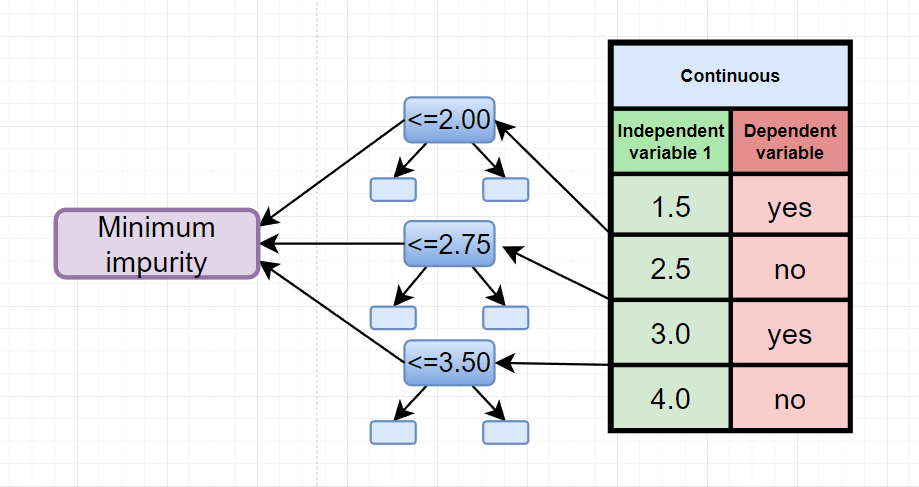

In [457]:
#same as discrete
def gini_continuous(X,y,index_to_use):
  
  X_temp = X.copy()
  y_temp = y.copy()
  uniques_values_list = set(X_temp)
  uniques_values_list = list(uniques_values_list)
  uniques_values_list.sort()
  uniques_values_list_y = set(y_temp)
  uniques_values_list_y = list(uniques_values_list_y)
  uniques_values_list_y.sort()

  impurity_middle_condition_list=[]
  for i in range(len(uniques_values_list[:-1])):
    impurity_middle_condition_list.append( (uniques_values_list[i] +uniques_values_list[i+1])/2)
  
  impurity_dict = {}
  for x in range(len(impurity_middle_condition_list)):
    left_0 = 0
    left_1 = 0
    right_0 = 0
    right_1 = 0
    index = 0
    index_left = []
    index_right = []
    # adding to variables
    for i in range(len(X)):
      if i in index_to_use:
        if (X[i] > impurity_middle_condition_list[x]) & (y_temp[i]==uniques_values_list_y[0]):
          right_0 += 1 
          index_right.append(index)
        elif (X[i] > impurity_middle_condition_list[x]) & (y_temp[i]==uniques_values_list_y[1]):
          right_1 += 1 
          index_right.append(index)
        elif (X[i]<=impurity_middle_condition_list[x]) & (y_temp[i]==uniques_values_list_y[0]):
          left_0 += 1 
          index_left.append(index)
        elif (X[i]<=impurity_middle_condition_list[x]) & (y_temp[i]==uniques_values_list_y[1]):
          left_1 += 1 
          index_left.append(index)
      index +=1
    impurity_dict[x] = [left_1, left_0, right_1, right_0, ['<=',impurity_middle_condition_list[x]],['>',impurity_middle_condition_list[x]],index_left,index_right]

  # selecting the minimum impurity
  minimum_impurity = 2
  key_selected = 0
  for k,v in impurity_dict.items():
    temp_impurity = impurity(v[0], v[1], v[2], v[3])
    if temp_impurity<minimum_impurity:
      minimum_impurity = temp_impurity
      key_selected = k


  return [minimum_impurity, (impurity_dict[key_selected][4],impurity_dict[key_selected][5]),(impurity_dict[key_selected][6],impurity_dict[key_selected][7]),
          (impurity_dict[key_selected][0],impurity_dict[key_selected][1],impurity_dict[key_selected][2],impurity_dict[key_selected][3])]

## Main Functions

### def func_tree

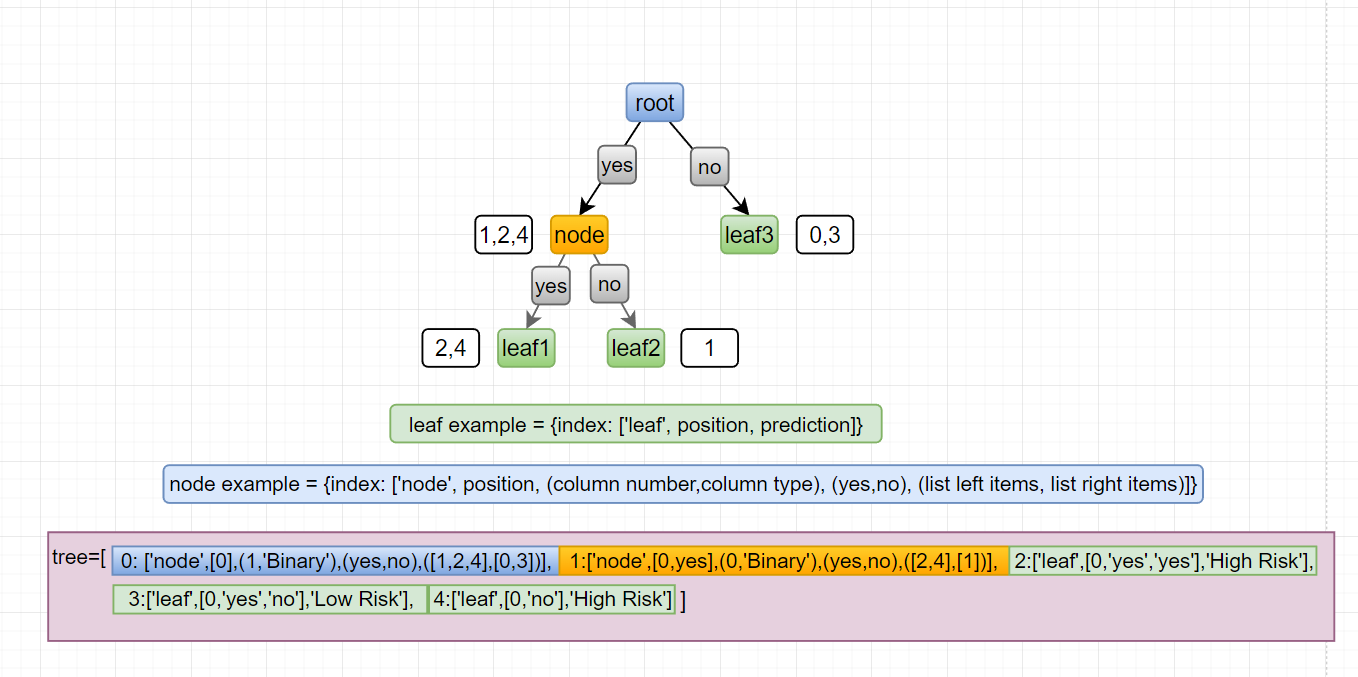

In [458]:
def func_tree(tree,type_X_y_dict,position,index_to_use,max_depth,min_sample,bootstrap_ratio_of_initial_sample,quantity_random_columns_to_select,
              columns_available_to_select):

  #copying for do not change with append
  type_X_y_dict_to_use = type_X_y_dict.copy()
  index_to_use_temp = index_to_use.copy()

  is_the_root_calculation = len(tree)==0

  # calculating and randomizing the initial index_to_use_temp
  if is_the_root_calculation:
    total_length_sample = len(type_X_y_dict[0][2])
    quantity_of_index_to_use_temp= int(total_length_sample*bootstrap_ratio_of_initial_sample)
    if quantity_of_index_to_use_temp == 0:
      quantity_of_index_to_use_temp=1
    index_to_use_temp= random.choices(index_to_use_temp, k = quantity_of_index_to_use_temp)

  # calculating and randomizing the columns
  columns_available_to_select_instance = columns_available_to_select.copy()

  if (quantity_random_columns_to_select<1):
    quantity_random_columns_to_select = 1

  if quantity_random_columns_to_select > len(columns_available_to_select_instance):
    quantity_random_columns_to_select = len(columns_available_to_select_instance)

  list_columns_picked =[]
  columns_available_to_select_instance_temp = columns_available_to_select_instance.copy()
  for x in range(quantity_random_columns_to_select):
    column_picked_temp = random.choice(columns_available_to_select_instance_temp)
    list_columns_picked.append(column_picked_temp)
    columns_available_to_select_instance_temp.remove(column_picked_temp)


  impurity_dict = {}  # key = column number : values = [impurity(left_1, left_0, right_1, right_0),(uniques_values_list[1],uniques_values_list[0]),(index_left,index_right) ,(left_1, left_0, right_1, right_0)]
  column_type = []
  for k,v in type_X_y_dict_to_use.items():
    if k in list_columns_picked:
      if v[0] == 'Binary':
        impurity_dict[k] = gini_binary(v[1],v[2],index_to_use_temp)
        column_type.append('Binary')
      elif v[0] == 'Ordinal':
        impurity_dict[k] = gini_ordinal(v[1],v[2],index_to_use_temp)
        column_type.append('Ordinal')
      elif v[0] == 'Discrete':
        impurity_dict[k] = gini_discrete(v[1],v[2],index_to_use_temp)
        column_type.append('Discrete')
      elif v[0] == 'Categorical':
        impurity_dict[k] = gini_categorical(v[1],v[2],index_to_use_temp)
        column_type.append('Categorical')
      elif v[0] == 'Continuous':
        impurity_dict[k] = gini_continuous(v[1],v[2],index_to_use_temp)
        column_type.append('Continuous')
      else:
        column_type = 'Error'
        print('Error: column_type not found')
    else: 
      high_impurity_to_not_use = 100
      impurity_dict[k] = [high_impurity_to_not_use]
      column_type.append('None')

  column_type_temp = column_type.copy()
  # searching for minimum impurity
  column_min = 0
  impurity_min = 100
  for k,v in impurity_dict.items():
    if v[0] < impurity_min:
      column_min = k
      impurity_min = v[0]

  independent_variable = type_X_y_dict[0][2].copy()
  impurity_dict_temp = impurity_dict.copy()
  gini_impurity = impurity_dict_temp[column_min][0]
  left_branch_condition, right_branch_condition = impurity_dict_temp[column_min][1][0],impurity_dict_temp[column_min][1][1]
  left_branch_array, right_branch_array = impurity_dict_temp[column_min][2][0],impurity_dict_temp[column_min][2][1]
  left_1, left_0, right_1, right_0 = impurity_dict_temp[column_min][3][0],impurity_dict_temp[column_min][3][1],impurity_dict_temp[column_min][3][2],impurity_dict_temp[column_min][3][3]
  
  instance_position0 = position.copy()
  instance_position1 = position.copy()
  instance_position2 = position.copy()

  size = len(tree)
  tree[size] = ['node',instance_position0,(column_min,column_type_temp[column_min]),(left_branch_condition,right_branch_condition),(left_branch_array,right_branch_array)]
  size = len(tree)

  left_side_leaf_condition = ( len(left_branch_array) <= min_sample) or (len(instance_position1) >= max_depth) or (left_1 == 0 or left_0 == 0 ) or (len(left_branch_array)==0) 
  right_side_leaf_condition =( len(right_branch_array) <= min_sample) or (len(instance_position2) >= max_depth ) or (right_1 == 0 or right_1 == 0 ) or (len(right_branch_array)==0)
  

  y_temp = independent_variable.copy()
  uniques_values_list_y = set(y_temp)
  uniques_values_list_y = list(uniques_values_list_y)
  uniques_values_list_y.sort()


  # left side
  if left_side_leaf_condition:
    #right leaf
    size = len(tree)
    instance_position1.append(left_branch_condition)
    if left_1 > left_0:
      tree[size] = ['leaf',instance_position1 ,uniques_values_list_y[1]]
    elif left_1 < left_0:
      tree[size] = ['leaf',instance_position1 ,uniques_values_list_y[0]]
    else:
      tree[size] = ['leaf',instance_position1 ,uniques_values_list_y[1]]

  else:
    # left node
    instance_position1.append(left_branch_condition)
    func_tree(tree,type_X_y_dict,instance_position1,index_to_use = left_branch_array,max_depth=max_depth,min_sample=min_sample, bootstrap_ratio_of_initial_sample= bootstrap_ratio_of_initial_sample,
              quantity_random_columns_to_select=quantity_random_columns_to_select,columns_available_to_select=columns_available_to_select_instance) 
  
  # right side
  if right_side_leaf_condition:

    # right leaf
    size = len(tree)
    instance_position2.append(right_branch_condition)
    if right_1 > right_0:
      tree[size] = ['leaf',instance_position2 ,uniques_values_list_y[1]]
    elif right_1 < right_0:
      tree[size] = ['leaf',instance_position2 ,uniques_values_list_y[0]]
    else:
      tree[size] = ['leaf',instance_position2 ,uniques_values_list_y[1]]

  else:
    # right node
    instance_position2.append(right_branch_condition)
    func_tree(tree,type_X_y_dict,instance_position2,index_to_use =right_branch_array,max_depth=max_depth,min_sample=min_sample, bootstrap_ratio_of_initial_sample= bootstrap_ratio_of_initial_sample,
              quantity_random_columns_to_select=quantity_random_columns_to_select,columns_available_to_select = columns_available_to_select_instance) 

    

  #print('impurity:',impurity_dict.items())
  #print('root', column_min, impurity_min)
  #print('tree', tree)


### def DecisionTreeClassification

In [459]:
def DecisionTreeClassification(X,y,max_depth=3,min_sample=5,number_of_trees=1000, bootstrap_ratio_of_initial_sample=0.1,random_state=0,
                               quantity_random_columns_to_select=2):
  
  # if data in numpy format, convert for normal format
  if type (X)== np.ndarray:
    X = np.ndarray.tolist(X)

  random.seed(random_state)

  type_X_y_dict = {} # key = column number, values = [type,X,y]
  
  #1° time defining the type of column
  for col in range(len(X[0])):
    
    # checking list type
    y_temp = list(y)
    #X_temp = list(X[:,col])

    X_temp = []
    for x in range(len(X)):
      X_temp.append(X[x][col])

    temp_list_int = [ type(x) == int for x in X_temp]
    temp_list_str = [ type(x) == str for x in X_temp]
    temp_list_float_or_int = [ (type(x)==float or type(x)==int) for x in X_temp]

    uniques_values = set(X_temp)
    uniques_values_sorted = sorted(uniques_values)
    # checking for ordinal
    if all(temp_list_int):
      is_all_sucessor = []
      for x in range(len(uniques_values_sorted[:-1])):
          is_all_sucessor.append(uniques_values_sorted[x+1]-uniques_values_sorted[x]==1)

    # if Binary
    if len(uniques_values_sorted) ==2 or len(uniques_values_sorted) ==1: 
      type_X_y_dict[col] = ['Binary',X_temp,y_temp]
    # if Ordinal
    elif all(temp_list_int) and all(is_all_sucessor):
      type_X_y_dict[col] = ['Ordinal',X_temp,y_temp]
    # if Discrete
    elif all(temp_list_int) :
      type_X_y_dict[col] = ['Discrete',X_temp,y_temp]
    # if Categorical
    elif all(temp_list_str):
      type_X_y_dict[col] = ['Categorical',X_temp,y_temp]
    # if Continuous
    elif all(temp_list_float_or_int ):
      type_X_y_dict[col] = ['Continuous',X_temp,y_temp]
    # error
    else:
      print('Error: column number:', col , ' does not have uniform data')

  # 2° creating the tree

  forest = {}
  for tree_number in range(number_of_trees):

    #initial parameter
    tree = {}
    columns_available_to_select = []
    array_index_to_use=[]
    for x in range(len(X)):
      array_index_to_use.append(x)
    for x in range(len(type_X_y_dict)):
      columns_available_to_select.append(x)

    func_tree(tree,type_X_y_dict,position=[0],index_to_use=array_index_to_use ,max_depth = max_depth,min_sample=min_sample,bootstrap_ratio_of_initial_sample= bootstrap_ratio_of_initial_sample,
              quantity_random_columns_to_select=quantity_random_columns_to_select,columns_available_to_select= columns_available_to_select) 
    forest[tree_number] = tree


  return forest


### def predict

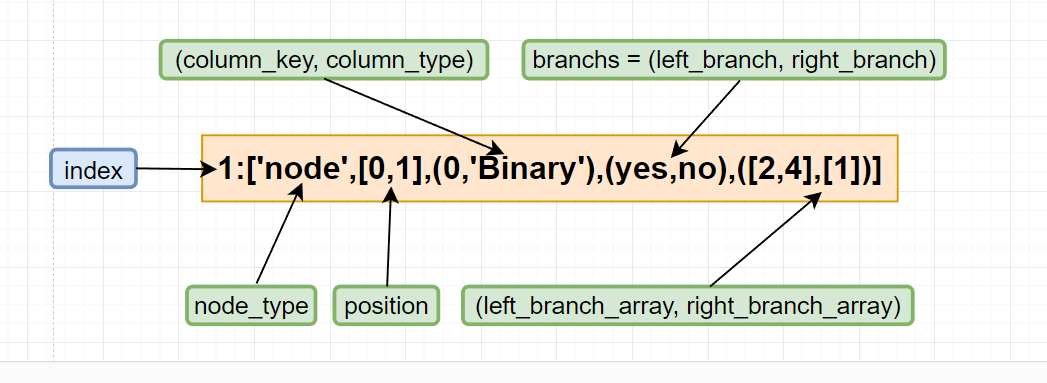

In [460]:

def predict(X,forest,verbose = False):

  forest_predictions_list =[]

  for n in range(len(X)):
    the_element_to_be_predict = X[n]

    if verbose == True:
      print()
      print('the_element_to_be_predict number:',n)
      print('the_element_to_be_predict number:',the_element_to_be_predict)

    predictions_list = []
    for k, tree in forest.items():
      index = 0
      stay_while = True

      while stay_while:

        if verbose == True:
          print()
          print('index',index)

        node_type = tree[index][0]
        position = tree[index][1]

        if node_type=='leaf':
          stay_while = False
          prediction_on_this_leaf = tree[index][2]
          predictions_list.append(prediction_on_this_leaf)

        elif node_type=='node':

          column_key = tree[index][2][0]
          column_type = tree[index][2][1]
          branchs = tree[index][3]
          left_branch = tree[index][3][0]
          right_branch = tree[index][3][1]
          left_branch_array = tree[index][4][0]
          right_branch_array = tree[index][4][1]
          new_branch = None
          new_position = None

          if column_type =='Binary':
            
            # select the condition eg: 0,1 or yes or no
            for i in range(len(branchs)):
              if the_element_to_be_predict[column_key] == branchs[i]:
                new_branch = branchs[i]
            # position to search
            new_position = position.copy()
            new_position.append(new_branch)
            
            # searching for a new key on dict tree
            for i in range(len(tree)):
              if tree[i][1] == new_position:
                index = i
                break

          elif column_type =='Ordinal':

            ordinal_branch = branchs
            ordinal_branch_left_symbol = ordinal_branch[0][0]
            ordinal_branch_right_symbol = ordinal_branch[1][0]
            ordinal_branch_number = ordinal_branch[0][1]

            # select the condition eg: 0,1 or yes or no
            if the_element_to_be_predict[column_key] <= ordinal_branch_number:
              new_branch = left_branch
            else:
              new_branch = right_branch

            # position to search
            new_position = position.copy()
            new_position.append(new_branch)          

            # searching for a new key on dict tree
            for i in range(len(tree)):
              if tree[i][1] == new_position:
                index = i
                break

            if verbose == True:
              print('ordinal_branch_number',ordinal_branch_number)

          elif (column_type =='Continuous') or (column_type =='Discrete'):
            
            continuous_branch = branchs
            continuous_branch_left_symbol = continuous_branch[0][0]
            continuous_branch_right_symbol = continuous_branch[1][0]
            continuous_branch_number = continuous_branch[0][1]

            # select the condition eg: 0,1 or yes or no
            if the_element_to_be_predict[column_key] <= continuous_branch_number:
              new_branch = left_branch
            else:
              new_branch = right_branch

            # position to search
            new_position = position.copy()
            new_position.append(new_branch)          

            # searching for a new key on dict tree
            for i in range(len(tree)):
              if tree[i][1] == new_position:
                index = i
                break

            if verbose == True:
              print('continuous_branch_number',continuous_branch_number)

          elif column_type =='Categorical':
            
            categorical_branch = branchs
            categorical_branch_left_symbol = categorical_branch[0][0]
            categorical_branch_right_symbol = categorical_branch[1][0]
            categorical_branch_string = categorical_branch[0][1]
      
            # select the condition eg: 0,1 or yes or no
            if the_element_to_be_predict[column_key] in categorical_branch_string:
              new_branch = left_branch
            else:
              new_branch = right_branch

            # position to search
            new_position = position.copy()
            new_position.append(new_branch)          

            # searching for a new key on dict tree
            for i in range(len(tree)):
              if tree[i][1] == new_position:
                index = i
                break
            if verbose == True:
              print('categorical_branch_string',categorical_branch_string)

          else:
            print('Error: column_type not found')
            
          if verbose == True:
            print('node_type',node_type)
            print('position' ,position)
            print('column_key' ,column_key)
            print('column_type' ,column_type)
            print('branchs' ,branchs)
            print('left_branch',left_branch) 
            print('right_branch' ,right_branch)
            print('left_branch_array',left_branch_array) 
            print('right_branch_array' ,right_branch_array)
            print('new_branch' ,new_branch)
            print('new_position' ,new_position)
    forest_predictions_list.append(st.mode(predictions_list))





  return forest_predictions_list


# Predicting with small samples

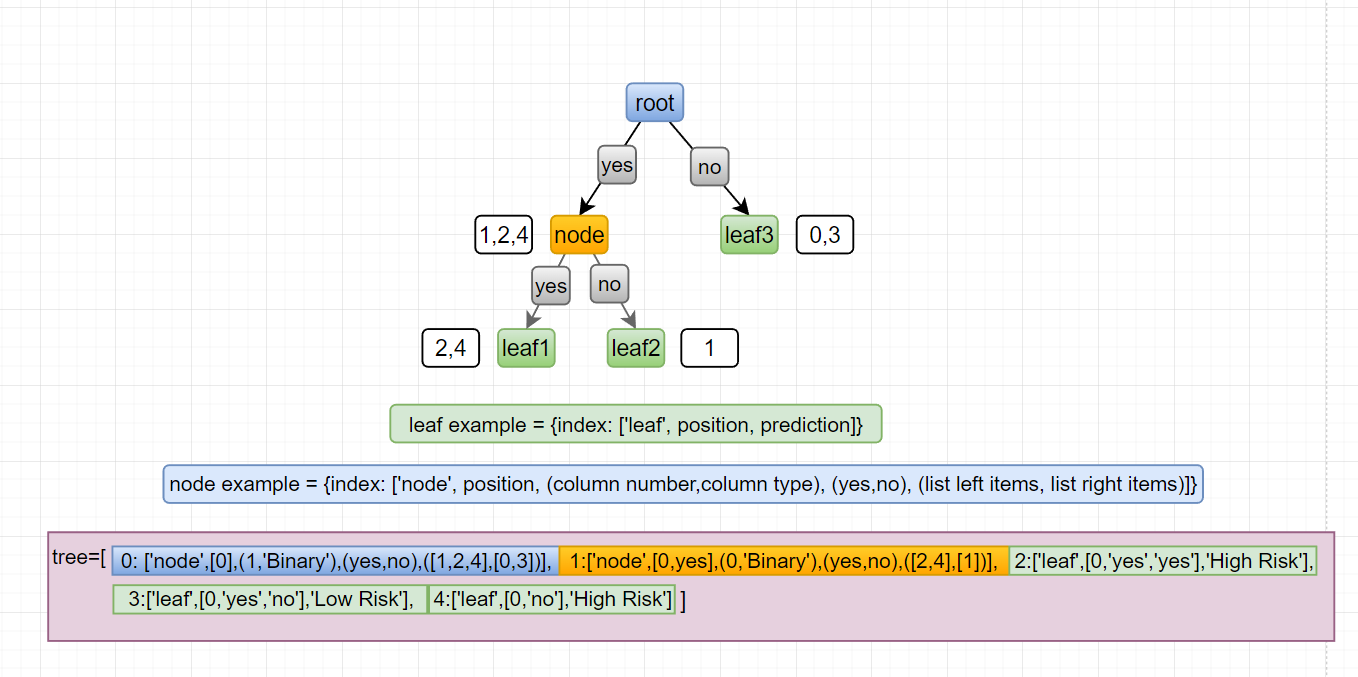

## Predict with: Binary, simple

In [461]:
data_dict = {'Binary':[1,1,0,0],'Dependent Variable': [0,1,0,1]}
data_raw = pd.DataFrame(data_dict)
X = data_raw.iloc[:,:-1].values
y = data_raw.iloc[:,-1].values
forest = DecisionTreeClassification(X,y)

for k,v in forest.items():
  print(k,v)
  
X= [[1]] 
y = predict(X,forest,verbose= False)
print('Prediction:', y)


0 {0: ['node', [0], (0, 'Binary'), (1, 0), ([], [3])], 1: ['leaf', [0, 1], 1], 2: ['leaf', [0, 0], 1]}
1 {0: ['node', [0], (0, 'Binary'), (1, 0), ([0], [])], 1: ['leaf', [0, 1], 0], 2: ['leaf', [0, 0], 1]}
2 {0: ['node', [0], (0, 'Binary'), (1, 0), ([1], [])], 1: ['leaf', [0, 1], 1], 2: ['leaf', [0, 0], 1]}
3 {0: ['node', [0], (0, 'Binary'), (1, 0), ([], [3])], 1: ['leaf', [0, 1], 1], 2: ['leaf', [0, 0], 1]}
4 {0: ['node', [0], (0, 'Binary'), (1, 0), ([], [2])], 1: ['leaf', [0, 1], 1], 2: ['leaf', [0, 0], 0]}
5 {0: ['node', [0], (0, 'Binary'), (1, 0), ([], [2])], 1: ['leaf', [0, 1], 1], 2: ['leaf', [0, 0], 0]}
6 {0: ['node', [0], (0, 'Binary'), (1, 0), ([0], [])], 1: ['leaf', [0, 1], 0], 2: ['leaf', [0, 0], 1]}
7 {0: ['node', [0], (0, 'Binary'), (1, 0), ([], [2])], 1: ['leaf', [0, 1], 1], 2: ['leaf', [0, 0], 0]}
8 {0: ['node', [0], (0, 'Binary'), (1, 0), ([], [3])], 1: ['leaf', [0, 1], 1], 2: ['leaf', [0, 0], 1]}
9 {0: ['node', [0], (0, 'Binary'), (1, 0), ([1], [])], 1: ['leaf', [0, 1]

## Predict with: Binary, bigger data to predict

In [462]:
data_dict = {'Binary':[1,0,0,0,1,1,1,0,0,1],'Binary2':[0,0,1,0,1,1,0,0,0,1],'Binary3':[1,1,0,1,0,1,0,0,1,0],'Dependent Variable': [1,1,0,1,0,0,1,0,0,0]}
data_raw = pd.DataFrame(data_dict)
X = data_raw.iloc[:,:-1].values
y = data_raw.iloc[:,-1].values
forest = DecisionTreeClassification(X,y)

for k,v in forest.items():
  print(k,v)
  
X= [[1,1,1],[1,0,0],[1,0,1],[0,1,1],[0,0,0]] 
y = predict(X,forest,verbose= False)
print('Prediction:', y)


0 {0: ['node', [0], (0, 'Binary'), (1, 0), ([], [8])], 1: ['leaf', [0, 1], 1], 2: ['leaf', [0, 0], 0]}
1 {0: ['node', [0], (1, 'Binary'), (1, 0), ([2], [])], 1: ['leaf', [0, 1], 0], 2: ['leaf', [0, 0], 1]}
2 {0: ['node', [0], (1, 'Binary'), (1, 0), ([4], [])], 1: ['leaf', [0, 1], 0], 2: ['leaf', [0, 0], 1]}
3 {0: ['node', [0], (0, 'Binary'), (1, 0), ([], [3])], 1: ['leaf', [0, 1], 1], 2: ['leaf', [0, 0], 1]}
4 {0: ['node', [0], (0, 'Binary'), (1, 0), ([], [2])], 1: ['leaf', [0, 1], 1], 2: ['leaf', [0, 0], 0]}
5 {0: ['node', [0], (0, 'Binary'), (1, 0), ([9], [])], 1: ['leaf', [0, 1], 0], 2: ['leaf', [0, 0], 1]}
6 {0: ['node', [0], (0, 'Binary'), (1, 0), ([], [3])], 1: ['leaf', [0, 1], 1], 2: ['leaf', [0, 0], 1]}
7 {0: ['node', [0], (1, 'Binary'), (1, 0), ([], [8])], 1: ['leaf', [0, 1], 1], 2: ['leaf', [0, 0], 0]}
8 {0: ['node', [0], (0, 'Binary'), (1, 0), ([4], [])], 1: ['leaf', [0, 1], 0], 2: ['leaf', [0, 0], 1]}
9 {0: ['node', [0], (0, 'Binary'), (1, 0), ([4], [])], 1: ['leaf', [0, 1]

## Predict with: Binary, bigger data to input

In [463]:
data_dict = {'Binary':[1,0,0,0,1,1,1,0,0,1],'Binary2':[0,0,1,0,1,1,0,0,0,1],'Binary3':[1,1,0,1,0,1,0,0,1,0],'Dependent Variable': [1,1,0,1,0,0,1,0,0,0]}
data_raw = pd.DataFrame(data_dict)
X = data_raw.iloc[:,:-1].values
y = data_raw.iloc[:,-1].values
forest = DecisionTreeClassification(X,y)

for k,v in forest.items():
  print(k,v)
  
X= [[1,1,1]] 
y = predict(X,forest,verbose= False)
print('Prediction:', y)


0 {0: ['node', [0], (0, 'Binary'), (1, 0), ([], [8])], 1: ['leaf', [0, 1], 1], 2: ['leaf', [0, 0], 0]}
1 {0: ['node', [0], (1, 'Binary'), (1, 0), ([2], [])], 1: ['leaf', [0, 1], 0], 2: ['leaf', [0, 0], 1]}
2 {0: ['node', [0], (1, 'Binary'), (1, 0), ([4], [])], 1: ['leaf', [0, 1], 0], 2: ['leaf', [0, 0], 1]}
3 {0: ['node', [0], (0, 'Binary'), (1, 0), ([], [3])], 1: ['leaf', [0, 1], 1], 2: ['leaf', [0, 0], 1]}
4 {0: ['node', [0], (0, 'Binary'), (1, 0), ([], [2])], 1: ['leaf', [0, 1], 1], 2: ['leaf', [0, 0], 0]}
5 {0: ['node', [0], (0, 'Binary'), (1, 0), ([9], [])], 1: ['leaf', [0, 1], 0], 2: ['leaf', [0, 0], 1]}
6 {0: ['node', [0], (0, 'Binary'), (1, 0), ([], [3])], 1: ['leaf', [0, 1], 1], 2: ['leaf', [0, 0], 1]}
7 {0: ['node', [0], (1, 'Binary'), (1, 0), ([], [8])], 1: ['leaf', [0, 1], 1], 2: ['leaf', [0, 0], 0]}
8 {0: ['node', [0], (0, 'Binary'), (1, 0), ([4], [])], 1: ['leaf', [0, 1], 0], 2: ['leaf', [0, 0], 1]}
9 {0: ['node', [0], (0, 'Binary'), (1, 0), ([4], [])], 1: ['leaf', [0, 1]

In [464]:
import random
random.seed(0)
randomlist = []
for x in range(11):
  temp_list =[]
  for i in range(0,100):
    n = random.randint(0,1)
    temp_list.append(n)
  randomlist.append(temp_list)
data_dict =  {'Binary':randomlist[0],'Binary2':randomlist[1],'Binary3':randomlist[2],'Binary4':randomlist[3],'Binary5':randomlist[4],'Binary6':randomlist[5],'Dependent Variable':randomlist[6]}
data_raw = pd.DataFrame(data_dict)
X = data_raw.iloc[:,:-1].values
y = data_raw.iloc[:,-1].values
forest = DecisionTreeClassification(X,y)

for k,v in forest.items():
  print(k,v)
  
X= [randomlist[7],randomlist[8],randomlist[9],randomlist[10]] 
y = predict(X,forest,verbose= False)
print('Prediction:', y)


0 {0: ['node', [0], (1, 'Binary'), (1, 0), ([47, 51, 58, 84], [25, 30, 40, 42, 75, 78])], 1: ['leaf', [0, 1], 1], 2: ['node', [0, 0], (3, 'Binary'), (1, 0), ([75], [25, 30, 40, 42, 78])], 3: ['leaf', [0, 0, 1], 0], 4: ['leaf', [0, 0, 0], 0]}
1 {0: ['node', [0], (2, 'Binary'), (1, 0), ([7, 53, 70, 79], [9, 13, 14, 60, 98])], 1: ['leaf', [0, 1], 0], 2: ['leaf', [0, 0], 0]}
2 {0: ['node', [0], (0, 'Binary'), (1, 0), ([26, 43, 47, 80, 86, 96], [10, 61, 91])], 1: ['node', [0, 1], (4, 'Binary'), (1, 0), ([47, 80, 86], [26, 43, 96])], 2: ['leaf', [0, 1, 1], 0], 3: ['leaf', [0, 1, 0], 0], 4: ['leaf', [0, 0], 1]}
3 {0: ['node', [0], (1, 'Binary'), (1, 0), ([62, 70, 71, 82], [6, 33, 61, 73, 78, 91])], 1: ['leaf', [0, 1], 0], 2: ['node', [0, 0], (5, 'Binary'), (1, 0), ([61, 73], [6, 33, 78, 91])], 3: ['leaf', [0, 0, 1], 1], 4: ['leaf', [0, 0, 0], 1]}
4 {0: ['node', [0], (1, 'Binary'), (1, 0), ([44, 50, 54, 55, 70, 81, 93], [8, 10, 32])], 1: ['node', [0, 1], (4, 'Binary'), (1, 0), ([50, 55, 81, 93

## Predict with: Binary, string

In [465]:
data_dict = {'Binary':['yes','no','no','no','yes','yes','yes','no','no','yes'],'Binary2':['no','no','yes','no','yes','yes','no','no','no','yes'],
             'Binary3':['yes','yes','no','yes','no','yes','no','no','yes','no'],'Dependent Variable': ['yes','yes','no','yes','no','no','yes','no','no','no']}
data_raw = pd.DataFrame(data_dict)
X = data_raw.iloc[:,:-1].values
y = data_raw.iloc[:,-1].values
forest = DecisionTreeClassification(X,y)

for k,v in forest.items():
  print(k,v)
  
X= [['yes','yes','yes'],['yes','yes','yes']]
y = predict(X,forest,verbose= False)
print('Prediction:', y)


0 {0: ['node', [0], (0, 'Binary'), ('yes', 'no'), ([], [8])], 1: ['leaf', [0, 'yes'], 'yes'], 2: ['leaf', [0, 'no'], 'no']}
1 {0: ['node', [0], (1, 'Binary'), ('yes', 'no'), ([2], [])], 1: ['leaf', [0, 'yes'], 'no'], 2: ['leaf', [0, 'no'], 'yes']}
2 {0: ['node', [0], (1, 'Binary'), ('yes', 'no'), ([4], [])], 1: ['leaf', [0, 'yes'], 'no'], 2: ['leaf', [0, 'no'], 'yes']}
3 {0: ['node', [0], (0, 'Binary'), ('yes', 'no'), ([], [3])], 1: ['leaf', [0, 'yes'], 'yes'], 2: ['leaf', [0, 'no'], 'yes']}
4 {0: ['node', [0], (0, 'Binary'), ('yes', 'no'), ([], [2])], 1: ['leaf', [0, 'yes'], 'yes'], 2: ['leaf', [0, 'no'], 'no']}
5 {0: ['node', [0], (0, 'Binary'), ('yes', 'no'), ([9], [])], 1: ['leaf', [0, 'yes'], 'no'], 2: ['leaf', [0, 'no'], 'yes']}
6 {0: ['node', [0], (0, 'Binary'), ('yes', 'no'), ([], [3])], 1: ['leaf', [0, 'yes'], 'yes'], 2: ['leaf', [0, 'no'], 'yes']}
7 {0: ['node', [0], (1, 'Binary'), ('yes', 'no'), ([], [8])], 1: ['leaf', [0, 'yes'], 'yes'], 2: ['leaf', [0, 'no'], 'no']}
8 {0: 

## Predict with: Ordinal

In [466]:

data_dict = {'Ordinal':[3,4,1,2,2,2,3,4,3,1],'Ordinal1':[4,4,1,2,2,2,3,4,3,1],'Dependent Variable': [1,1,0,1,0,0,1,0,0,0]}

data_raw = pd.DataFrame(data_dict)
X = data_raw.iloc[:,:-1].values
y = data_raw.iloc[:,-1].values
forest = DecisionTreeClassification(X,y)

for k,v in forest.items():
  print(k,v)

X= [[2,3,'a']]
y = predict(X,forest,verbose= False)
print('Prediction:', y)


0 {0: ['node', [0], (0, 'Ordinal'), (['<=', 1], ['>', 1]), ([], [8])], 1: ['leaf', [0, ['<=', 1]], 1], 2: ['leaf', [0, ['>', 1]], 0]}
1 {0: ['node', [0], (0, 'Ordinal'), (['<=', 1], ['>', 1]), ([2], [])], 1: ['leaf', [0, ['<=', 1]], 0], 2: ['leaf', [0, ['>', 1]], 1]}
2 {0: ['node', [0], (0, 'Ordinal'), (['<=', 1], ['>', 1]), ([9], [])], 1: ['leaf', [0, ['<=', 1]], 0], 2: ['leaf', [0, ['>', 1]], 1]}
3 {0: ['node', [0], (0, 'Ordinal'), (['<=', 1], ['>', 1]), ([], [3])], 1: ['leaf', [0, ['<=', 1]], 1], 2: ['leaf', [0, ['>', 1]], 1]}
4 {0: ['node', [0], (0, 'Ordinal'), (['<=', 1], ['>', 1]), ([2], [])], 1: ['leaf', [0, ['<=', 1]], 0], 2: ['leaf', [0, ['>', 1]], 1]}
5 {0: ['node', [0], (0, 'Ordinal'), (['<=', 1], ['>', 1]), ([9], [])], 1: ['leaf', [0, ['<=', 1]], 0], 2: ['leaf', [0, ['>', 1]], 1]}
6 {0: ['node', [0], (0, 'Ordinal'), (['<=', 1], ['>', 1]), ([], [0])], 1: ['leaf', [0, ['<=', 1]], 1], 2: ['leaf', [0, ['>', 1]], 1]}
7 {0: ['node', [0], (0, 'Ordinal'), (['<=', 1], ['>', 1]), ([]

## Predict with: Discrete

In [467]:


data_dict = {'Discrete':[-3,6,5,-5,0,4,5,1,3,3],'Dependent Variable': [1,1,0,1,0,0,1,0,0,0]}

data_raw = pd.DataFrame(data_dict)
X = data_raw.iloc[:,:-1].values
y = data_raw.iloc[:,-1].values
forest = DecisionTreeClassification(X,y)

for k,v in forest.items():
  print(k,v)
  
X= [[2]]
y = predict(X,forest,verbose= False)
print('Prediction:', y)


0 {0: ['node', [0], (0, 'Discrete'), (['<=', -4.0], ['>', -4.0]), ([], [8])], 1: ['leaf', [0, ['<=', -4.0]], 1], 2: ['leaf', [0, ['>', -4.0]], 0]}
1 {0: ['node', [0], (0, 'Discrete'), (['<=', -4.0], ['>', -4.0]), ([], [0])], 1: ['leaf', [0, ['<=', -4.0]], 1], 2: ['leaf', [0, ['>', -4.0]], 1]}
2 {0: ['node', [0], (0, 'Discrete'), (['<=', -4.0], ['>', -4.0]), ([], [4])], 1: ['leaf', [0, ['<=', -4.0]], 1], 2: ['leaf', [0, ['>', -4.0]], 0]}
3 {0: ['node', [0], (0, 'Discrete'), (['<=', -4.0], ['>', -4.0]), ([], [9])], 1: ['leaf', [0, ['<=', -4.0]], 1], 2: ['leaf', [0, ['>', -4.0]], 0]}
4 {0: ['node', [0], (0, 'Discrete'), (['<=', -4.0], ['>', -4.0]), ([], [5])], 1: ['leaf', [0, ['<=', -4.0]], 1], 2: ['leaf', [0, ['>', -4.0]], 0]}
5 {0: ['node', [0], (0, 'Discrete'), (['<=', -4.0], ['>', -4.0]), ([], [5])], 1: ['leaf', [0, ['<=', -4.0]], 1], 2: ['leaf', [0, ['>', -4.0]], 0]}
6 {0: ['node', [0], (0, 'Discrete'), (['<=', -4.0], ['>', -4.0]), ([], [1])], 1: ['leaf', [0, ['<=', -4.0]], 1], 2: ['

## Predict with: Categorical

In [468]:
data_dict = {'Categorical ':['a','b','c','d','d','a','a','c','b','b'],'Dependent Variable': [1,1,0,1,0,0,1,0,0,0]}

data_raw = pd.DataFrame(data_dict)
X = data_raw.iloc[:,:-1].values
y = data_raw.iloc[:,-1].values
forest = DecisionTreeClassification(X,y)

for k,v in forest.items():
  print(k,v)
  
X= [['a']]
y = predict(X,forest,verbose= False)
print('Prediction:', y)

0 {0: ['node', [0], (0, 'Categorical'), (['in', ('a',)], ['not in', ('a',)]), ([], [8])], 1: ['leaf', [0, ['in', ('a',)]], 1], 2: ['leaf', [0, ['not in', ('a',)]], 0]}
1 {0: ['node', [0], (0, 'Categorical'), (['in', ('a',)], ['not in', ('a',)]), ([0], [])], 1: ['leaf', [0, ['in', ('a',)]], 1], 2: ['leaf', [0, ['not in', ('a',)]], 1]}
2 {0: ['node', [0], (0, 'Categorical'), (['in', ('a',)], ['not in', ('a',)]), ([], [4])], 1: ['leaf', [0, ['in', ('a',)]], 1], 2: ['leaf', [0, ['not in', ('a',)]], 0]}
3 {0: ['node', [0], (0, 'Categorical'), (['in', ('a',)], ['not in', ('a',)]), ([], [9])], 1: ['leaf', [0, ['in', ('a',)]], 1], 2: ['leaf', [0, ['not in', ('a',)]], 0]}
4 {0: ['node', [0], (0, 'Categorical'), (['in', ('a',)], ['not in', ('a',)]), ([5], [])], 1: ['leaf', [0, ['in', ('a',)]], 0], 2: ['leaf', [0, ['not in', ('a',)]], 1]}
5 {0: ['node', [0], (0, 'Categorical'), (['in', ('a',)], ['not in', ('a',)]), ([5], [])], 1: ['leaf', [0, ['in', ('a',)]], 0], 2: ['leaf', [0, ['not in', ('a',)

## Predict with: Continuous

In [469]:

data_dict = {'Continuous ':[1,-0.344,0.11,0.77,1.23,-1.111,1.785,0.2346,0.111,1.999],'Dependent Variable': [1,1,0,1,0,0,1,0,0,0]}

data_raw = pd.DataFrame(data_dict)
X = data_raw.iloc[:,:-1].values
y = data_raw.iloc[:,-1].values
forest = DecisionTreeClassification(X,y)

for k,v in forest.items():
  print(k,v)
  
X= [[0.5]]
y = predict(X,forest,verbose= False)
print('Prediction:', y)


0 {0: ['node', [0], (0, 'Continuous'), (['<=', -0.7275], ['>', -0.7275]), ([], [8])], 1: ['leaf', [0, ['<=', -0.7275]], 1], 2: ['leaf', [0, ['>', -0.7275]], 0]}
1 {0: ['node', [0], (0, 'Continuous'), (['<=', -0.7275], ['>', -0.7275]), ([], [0])], 1: ['leaf', [0, ['<=', -0.7275]], 1], 2: ['leaf', [0, ['>', -0.7275]], 1]}
2 {0: ['node', [0], (0, 'Continuous'), (['<=', -0.7275], ['>', -0.7275]), ([], [4])], 1: ['leaf', [0, ['<=', -0.7275]], 1], 2: ['leaf', [0, ['>', -0.7275]], 0]}
3 {0: ['node', [0], (0, 'Continuous'), (['<=', -0.7275], ['>', -0.7275]), ([], [9])], 1: ['leaf', [0, ['<=', -0.7275]], 1], 2: ['leaf', [0, ['>', -0.7275]], 0]}
4 {0: ['node', [0], (0, 'Continuous'), (['<=', -0.7275], ['>', -0.7275]), ([5], [])], 1: ['leaf', [0, ['<=', -0.7275]], 0], 2: ['leaf', [0, ['>', -0.7275]], 1]}
5 {0: ['node', [0], (0, 'Continuous'), (['<=', -0.7275], ['>', -0.7275]), ([5], [])], 1: ['leaf', [0, ['<=', -0.7275]], 0], 2: ['leaf', [0, ['>', -0.7275]], 1]}
6 {0: ['node', [0], (0, 'Continuou

##Predict with: Binary and Ordinal, Discrete, Categorical and Continuous




In [470]:

data_dict = {'Binary':[1,0,0,0,1,1,1,0,0,1],'Binary2':[0,0,1,0,1,1,0,0,0,1],'Binary3':[1,1,0,1,0,1,0,0,1,0],'Ordinal':[10,11,12,13,14,11,11,12,14,10],'Discrete':[-3,6,5,-5,0,4,5,1,3,3],'Categorical':['a','b','c','d','d','a','a','c','b','b'],
             'Continuous':[1,-0.344,0.11,0.77,1.23,-1.111,1.785,0.2346,0.111,1.999],'Dependent Variable': [1,1,0,1,0,0,1,0,0,0]}

data_raw = pd.DataFrame(data_dict)
X = data_raw.iloc[:,:-1].values
y = data_raw.iloc[:,-1].values
forest = DecisionTreeClassification(X,y)

for k,v in forest.items():
  print(k,v)
  
X= [[1,0,1,11,3,'a',0.3]]
y = predict(X,forest,verbose= False)
print('Prediction:', y)


0 {0: ['node', [0], (3, 'Ordinal'), (['<=', 10], ['>', 10]), ([], [8])], 1: ['leaf', [0, ['<=', 10]], 1], 2: ['leaf', [0, ['>', 10]], 0]}
1 {0: ['node', [0], (3, 'Ordinal'), (['<=', 10], ['>', 10]), ([0], [])], 1: ['leaf', [0, ['<=', 10]], 1], 2: ['leaf', [0, ['>', 10]], 1]}
2 {0: ['node', [0], (2, 'Binary'), (1, 0), ([], [4])], 1: ['leaf', [0, 1], 1], 2: ['leaf', [0, 0], 0]}
3 {0: ['node', [0], (2, 'Binary'), (1, 0), ([], [9])], 1: ['leaf', [0, 1], 1], 2: ['leaf', [0, 0], 0]}
4 {0: ['node', [0], (1, 'Binary'), (1, 0), ([], [8])], 1: ['leaf', [0, 1], 1], 2: ['leaf', [0, 0], 0]}
5 {0: ['node', [0], (0, 'Binary'), (1, 0), ([], [1])], 1: ['leaf', [0, 1], 1], 2: ['leaf', [0, 0], 1]}
6 {0: ['node', [0], (2, 'Binary'), (1, 0), ([], [6])], 1: ['leaf', [0, 1], 1], 2: ['leaf', [0, 0], 1]}
7 {0: ['node', [0], (4, 'Discrete'), (['<=', -4.0], ['>', -4.0]), ([], [9])], 1: ['leaf', [0, ['<=', -4.0]], 1], 2: ['leaf', [0, ['>', -4.0]], 0]}
8 {0: ['node', [0], (0, 'Binary'), (1, 0), ([9], [])], 1: ['le

# Predicting with Titanic data

Data

In [471]:
data_raw=pd.read_csv('/content/data_for_survived.csv',index_col=0)
data = data_raw.copy()
data.dropna(inplace=True)
X = data.drop(["Name","Survived"],axis=1).values
y = data.iloc[:, -2].values

Split

In [472]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


Scalling

In [473]:
'''
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,:-10] = sc.fit_transform(X_train[:,:-10]) #slicing the dummy variable
X_test[:,:-10] = sc.transform(X_test[:,:-10])
'''

'\nfrom sklearn.preprocessing import StandardScaler\nsc = StandardScaler()\nX_train[:,:-10] = sc.fit_transform(X_train[:,:-10]) #slicing the dummy variable\nX_test[:,:-10] = sc.transform(X_test[:,:-10])\n'

Model

In [474]:
forest = DecisionTreeClassification(X_train,y_train)

Tree

In [475]:
for k,v in forest.items():
  print(k,v)
  

0 {0: ['node', [0], (2, 'Continuous'), (['<=', 0.5], ['>', 0.5]), ([0, 9, 57, 71, 77, 134, 136, 169, 173, 178, 185, 206, 215, 227, 231, 288, 299, 316, 318, 336, 351, 359, 361, 364, 384, 389, 392, 404, 409, 415, 424, 429, 434, 475, 486, 512, 538, 539, 558, 576, 579, 587, 617, 619, 639, 646, 647, 664, 688, 699], [184, 200, 220, 274, 283, 309, 339, 390, 418, 440, 503, 519, 571, 573, 601, 616, 642, 650, 686])], 1: ['node', [0, ['<=', 0.5]], (9, 'Binary'), (1.0, 0.0), ([409], [0, 9, 57, 71, 77, 134, 136, 169, 173, 178, 185, 206, 215, 227, 231, 288, 299, 316, 318, 336, 351, 359, 361, 364, 384, 389, 392, 404, 415, 424, 429, 434, 475, 486, 512, 538, 539, 558, 576, 579, 587, 617, 619, 639, 646, 647, 664, 688, 699])], 2: ['leaf', [0, ['<=', 0.5], 1.0], 0.0], 3: ['node', [0, ['<=', 0.5], 0.0], (4, 'Continuous'), (['<=', 79.42500000000001], ['>', 79.42500000000001]), ([0, 9, 71, 77, 134, 136, 169, 173, 178, 185, 206, 215, 227, 231, 288, 299, 316, 336, 351, 359, 361, 364, 389, 392, 404, 415, 424, 4

Single prediction

In [476]:
person= [[34,3,0,0,512.3292,0,1,0,0,1,0,0,0,0,0]]
y = predict(person,forest,verbose= False)
print('Prediction:', y)

Prediction: [0.0]


Full prediction

In [477]:
prediction = predict(X_test,forest,verbose= False)
prediction

[0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0

Confusion Matrix

In [478]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, prediction)
print('Confusion matrix: ')
print(cm)

print(f'True Positive:{cm[1][1]}  True Negative:{cm[0][0]}  False Positive:{cm[0][1]}  False Negative:{cm[1][0]}')

right = cm[1][1]+cm[0][0]
wrong = cm[1][0]+cm[0][1]
print(f'Predict right: {right} - Predict wrong: {wrong}')

acc = accuracy_score(y_test, prediction)
print('Accurate: ',acc)


Confusion matrix: 
[[92 18]
 [19 50]]
True Positive:50  True Negative:92  False Positive:18  False Negative:19
Predict right: 142 - Predict wrong: 37
Accurate:  0.7932960893854749
